# What it is

- Shapley analysis is a way to `fairly attribute credit (or blame) to individual features for a model's prediction`, based on ideas from cooperative game theory.

  - For this model with X, Y, Z features, how much did each feature contribute to it.
  - Great for a what-if analysis app.

    ## Game Theory background

    ```
    Players -> features
    Game payoff -> model prediction
    Goal -> fairly distribute the total payoff among players
    ```

    - A feature's Shapley value is `its average marginal contribution across all possible subsets of features`.


In [2]:
import sklearn
import shap
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
X, y = data.data, data.target

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

/Users/archit2904/Desktop/Notes/Notes/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Coefficients
- Magnitude itself is not a great indicator of the impact.

In [3]:
print("Model Coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], '=', model.coef_[i].round(5))

Model Coefficients:

age = -10.00987
sex = -239.81564
bmi = 519.84592
bp = 324.38465
s1 = -792.17564
s2 = 476.73902
s3 = 101.04327
s4 = 177.06324
s5 = 751.2737
s6 = 67.62669


# Partial Dependence Plots
- Can help visualize how changing a feature impacts the model's output and also the distribution of the feature's values.
- X-axis : Feature under consideration. Bars represent frequency of the value.
- Y-axis : E[f(x) | feature], average prediction given the x-axis value.
- Blue-line : Partial Dependence Plot, shows the relation of the prediction to the feature value.
- Dashed vertical line : E[feature], average feature value in the dataset.
- Dashed horizontal line : E[f(x)], average model prediction.

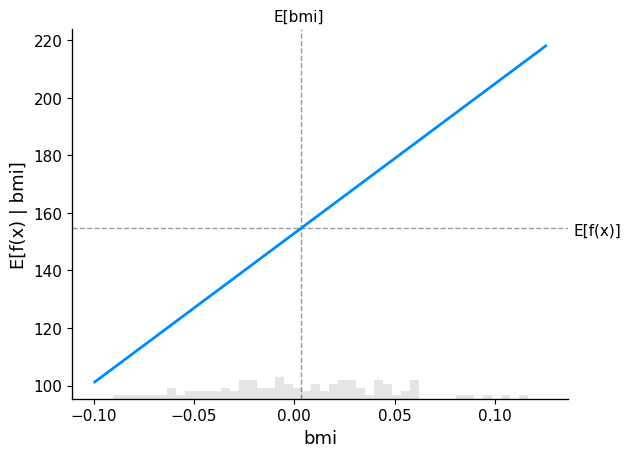

In [4]:
shap.partial_dependence_plot(
    "bmi",
    model.predict,
    X100,
    ice=False,
    model_expected_value = True,
    feature_expected_value = True
)

# SHAP Values
- For linear model SHAP value for a specific feature is the difference between expected model output and partial dependence plot at the features value.

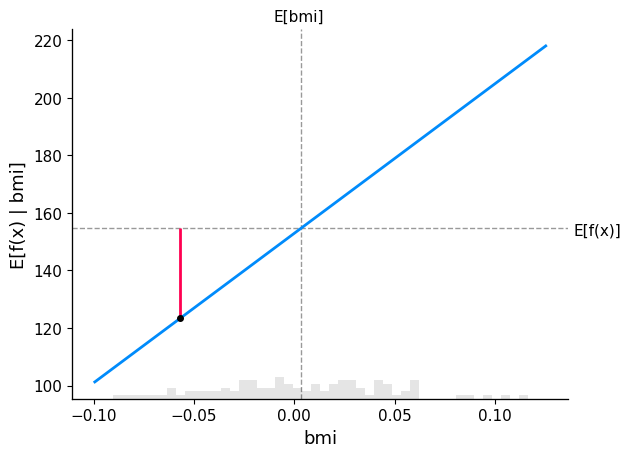

In [5]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

sample = 20
shap.partial_dependence_plot(
    "bmi",
    model.predict,
    X100,
    ice=False,
    model_expected_value = True,
    feature_expected_value = True,
    shap_values = shap_values[sample : sample + 1, :]
)